<a href="https://colab.research.google.com/github/tanzam085-a11y/fairseq/blob/main/LSTMBYLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate Python code to upload, unzip, and display data from the file "/content/drive/MyDrive/socialmeiadatasetNLP.zip", then prepare the data for an LSTM model, build and train the model, and evaluate it using the F1 score.

## Upload data

### Subtask:
Upload the data from the specified path.


**Reasoning**:
Define the path to the zipped dataset as instructed.



In [2]:
dataset_path = '/content/drive/MyDrive/socialmeiadatasetNLP.zip'

## Prepare data for LSTM

### Subtask:
Prepare the data for the LSTM model by performing necessary preprocessing steps.

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Text preprocessing
df['Text'] = df['Text'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.strip()

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])

# Padding
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Encode sentiment labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Sentiment'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

print("Data preparation complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data preparation complete.
Shape of X_train: (585, 100)
Shape of X_test: (147, 100)
Shape of y_train: (585,)
Shape of y_test: (147,)


In [3]:
import zipfile
import os
import pandas as pd

# Unzip the dataset
unzip_path = '/content/'
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

# Find the unzipped file (assuming it's a CSV)
unzipped_files = os.listdir(unzip_path)
csv_file = [f for f in unzipped_files if f.endswith('.csv')][0]
csv_path = os.path.join(unzip_path, csv_file)

# Load the data into a pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
display(df.head())

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM model
embedding_dim = 16
model = Sequential([
    Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_length),
    LSTM(64),
    Dense(24, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax') # Use the number of unique sentiment labels
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# Train the model
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)

# Display training history metrics (loss and accuracy)
print("\nTraining History:")
print("Loss (High, Low):", max(history.history['loss']), min(history.history['loss']))
print("Accuracy (High, Low):", max(history.history['accuracy']), min(history.history['accuracy']))
print("Validation Loss (High, Low):", max(history.history['val_loss']), min(history.history['val_loss']))
print("Validation Accuracy (High, Low):", max(history.history['val_accuracy']), min(history.history['val_accuracy']))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
19/19 - 5s - 274ms/step - accuracy: 0.0137 - loss: 5.6243 - val_accuracy: 0.0612 - val_loss: 5.6122
Epoch 2/10
19/19 - 1s - 51ms/step - accuracy: 0.0291 - loss: 5.5339 - val_accuracy: 0.0612 - val_loss: 5.5053
Epoch 3/10
19/19 - 1s - 54ms/step - accuracy: 0.0496 - loss: 5.3784 - val_accuracy: 0.0612 - val_loss: 5.5435
Epoch 4/10
19/19 - 1s - 62ms/step - accuracy: 0.0496 - loss: 5.2896 - val_accuracy: 0.0612 - val_loss: 5.6151
Epoch 5/10
19/19 - 1s - 50ms/step - accuracy: 0.0547 - loss: 5.2299 - val_accuracy: 0.0612 - val_loss: 5.6617
Epoch 6/10
19/19 - 1s - 54ms/step - accuracy: 0.0530 - loss: 5.1844 - val_accuracy: 0.0612 - val_loss: 5.6865
Epoch 7/10
19/19 - 1s - 71ms/step - accuracy: 0.0496 - loss: 5.1766 - val_accuracy: 0.0544 - val_loss: 5.7320
Epoch 8/10
19/19 - 2s - 86ms/step - accuracy: 0.0513 - loss: 5.1979 - val_accuracy: 0.0612 - val_loss: 5.7376
Epoch 9/10
19/19 - 2s - 128ms/step - accuracy: 0.0513 - loss: 5.0985 - val_accuracy: 0.0612 - val_loss: 5.8200
Epoch 10

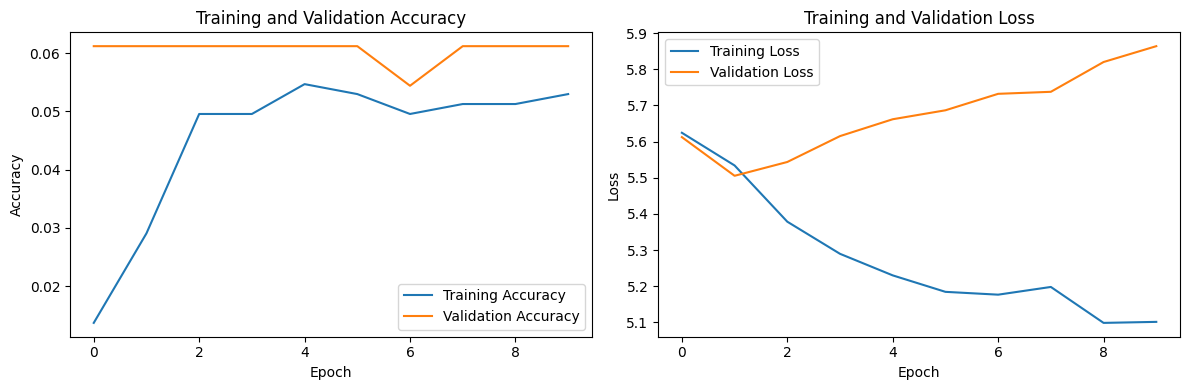

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import f1_score
import numpy as np

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)

# Get the predicted labels by finding the class with the highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate the F1 score
# Use 'weighted' average because the classes might be imbalanced
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nF1 Score (Weighted): {f1:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step

F1 Score (Weighted): 0.0071


# Task
Fine-tune the LSTM model for binary sentiment classification using the dataset "/content/drive/MyDrive/socialmeiadatasetNLP.zip", evaluate the model using F1 score, and explain how to fine-tune the model for binary classification.

## Filter data

### Subtask:
Filter the dataset to include only the two classes you want to use for binary classification.


**Reasoning**:
Identify the unique sentiment classes and filter the DataFrame to include only two classes for binary classification.



In [9]:
# Identify unique sentiment classes
unique_sentiments = df['Sentiment'].unique()
print("Unique sentiment classes:", unique_sentiments)

# Choose two classes for binary classification (e.g., 'Positive' and 'Negative')
chosen_classes = ['Positive', 'Negative']

# Filter the DataFrame to include only the chosen classes
df_binary = df[df['Sentiment'].isin(chosen_classes)].copy()

# Display the first few rows of the filtered DataFrame
display(df_binary.head())

Unique sentiment classes: [' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation   

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour


**Reasoning**:
The filtering did not work as expected because of leading/trailing spaces in the sentiment labels. I need to clean the 'Sentiment' column by stripping whitespace before filtering.



In [10]:
# Strip leading/trailing whitespace from the 'Sentiment' column
df['Sentiment'] = df['Sentiment'].str.strip()

# Identify unique sentiment classes again after stripping whitespace
unique_sentiments_cleaned = df['Sentiment'].unique()
print("Unique sentiment classes after cleaning:", unique_sentiments_cleaned)

# Choose two classes for binary classification (e.g., 'Positive' and 'Negative')
chosen_classes = ['Positive', 'Negative']

# Filter the DataFrame to include only the chosen classes
df_binary = df[df['Sentiment'].isin(chosen_classes)].copy()

# Display the first few rows and the shape of the filtered DataFrame
display(df_binary.head())
print("Shape of the binary DataFrame:", df_binary.shape)

Unique sentiment classes after cleaning: ['Positive' 'Negative' 'Neutral' 'Anger' 'Fear' 'Sadness' 'Disgust'
 'Happiness' 'Joy' 'Love' 'Amusement' 'Enjoyment' 'Admiration' 'Affection'
 'Awe' 'Disappointed' 'Surprise' 'Acceptance' 'Adoration' 'Anticipation'
 'Bitter' 'Calmness' 'Confusion' 'Excitement' 'Kind' 'Pride' 'Shame'
 'Elation' 'Euphoria' 'Contentment' 'Serenity' 'Gratitude' 'Hope'
 'Empowerment' 'Compassion' 'Tenderness' 'Arousal' 'Enthusiasm'
 'Fulfillment' 'Reverence' 'Despair' 'Grief' 'Loneliness' 'Jealousy'
 'Resentment' 'Frustration' 'Boredom' 'Anxiety' 'Intimidation'
 'Helplessness' 'Envy' 'Regret' 'Curiosity' 'Indifference' 'Numbness'
 'Melancholy' 'Nostalgia' 'Ambivalence' 'Determination' 'Zest' 'Hopeful'
 'Proud' 'Grateful' 'Empathetic' 'Compassionate' 'Playful' 'Free-spirited'
 'Inspired' 'Confident' 'Bitterness' 'Yearning' 'Fearful' 'Apprehensive'
 'Overwhelmed' 'Jealous' 'Devastated' 'Frustrated' 'Envious' 'Dismissive'
 'Thrill' 'Bittersweet' 'Overjoyed' 'Inspiratio

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,enjoying a beautiful day at the park,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,traffic was terrible this morning,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,just finished an amazing workout,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,excited about the upcoming weekend getaway,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
5,5,5,feeling grateful for the little things in life,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9


Shape of the binary DataFrame: (49, 15)


## Prepare data for binary classification

### Subtask:
Re-encode the labels for the two classes and split the data into training and testing sets.


**Reasoning**:
Re-encode the labels for the two classes and split the data into training and testing sets as instructed.



In [11]:
# Re-encode sentiment labels for binary classification
label_encoder_binary = LabelEncoder()
binary_labels = label_encoder_binary.fit_transform(df_binary['Sentiment'])

# Tokenization and Padding for the binary data
binary_sequences = tokenizer.texts_to_sequences(df_binary['Text'])
binary_padded_sequences = pad_sequences(binary_sequences, maxlen=max_length, padding='post', truncating='post')

# Split data into training and testing sets for binary classification
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    binary_padded_sequences, binary_labels, test_size=0.2, random_state=42
)

# Print the shapes of the resulting sets
print("Shape of X_train_binary:", X_train_binary.shape)
print("Shape of X_test_binary:", X_test_binary.shape)
print("Shape of y_train_binary:", y_train_binary.shape)
print("Shape of y_test_binary:", y_test_binary.shape)

Shape of X_train_binary: (39, 100)
Shape of X_test_binary: (10, 100)
Shape of y_train_binary: (39,)
Shape of y_test_binary: (10,)


## Modify lstm model for binary classification

### Subtask:
Adjust the final Dense layer of the LSTM model for binary output and change the loss function.


**Reasoning**:
Adjust the final Dense layer and loss function of the LSTM model for binary classification.



In [12]:
# Build the LSTM model for binary classification
embedding_dim = 16  # Keep the same embedding dimension
model_binary = Sequential([
    Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_length),
    LSTM(64),
    Dense(24, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Final layer with 1 unit and sigmoid activation for binary output
])

# Compile the binary model
model_binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the binary model summary
model_binary.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the binary classification model

### Subtask:
Train the modified model on the filtered and prepared data.


**Reasoning**:
Train the modified binary LSTM model using the prepared training and validation data.



In [13]:
# Train the binary model
history_binary = model_binary.fit(X_train_binary, y_train_binary, epochs=10, validation_data=(X_test_binary, y_test_binary), verbose=2)

# Print a confirmation message
print("\nBinary model training complete.")

Epoch 1/10
2/2 - 4s - 2s/step - accuracy: 0.8462 - loss: 0.6831 - val_accuracy: 1.0000 - val_loss: 0.6512
Epoch 2/10
2/2 - 0s - 88ms/step - accuracy: 0.8974 - loss: 0.6564 - val_accuracy: 1.0000 - val_loss: 0.6150
Epoch 3/10
2/2 - 0s - 96ms/step - accuracy: 0.8974 - loss: 0.6340 - val_accuracy: 1.0000 - val_loss: 0.5662
Epoch 4/10
2/2 - 0s - 93ms/step - accuracy: 0.8974 - loss: 0.5980 - val_accuracy: 1.0000 - val_loss: 0.4938
Epoch 5/10
2/2 - 0s - 138ms/step - accuracy: 0.8974 - loss: 0.5192 - val_accuracy: 1.0000 - val_loss: 0.3783
Epoch 6/10
2/2 - 0s - 151ms/step - accuracy: 0.8974 - loss: 0.4208 - val_accuracy: 1.0000 - val_loss: 0.2230
Epoch 7/10
2/2 - 0s - 145ms/step - accuracy: 0.8974 - loss: 0.4112 - val_accuracy: 1.0000 - val_loss: 0.1200
Epoch 8/10
2/2 - 0s - 144ms/step - accuracy: 0.8974 - loss: 0.3794 - val_accuracy: 1.0000 - val_loss: 0.0960
Epoch 9/10
2/2 - 1s - 422ms/step - accuracy: 0.8974 - loss: 0.3804 - val_accuracy: 1.0000 - val_loss: 0.1090
Epoch 10/10
2/2 - 1s - 45

## Evaluate binary classification model

### Subtask:
Evaluate the performance of the binary classification model using appropriate metrics.


**Reasoning**:
Calculate and print the weighted F1 score for the binary classification model.



In [14]:
from sklearn.metrics import f1_score
import numpy as np

# Predict probabilities for the binary test set
y_pred_probs_binary = model_binary.predict(X_test_binary)

# Convert predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary = (y_pred_probs_binary > 0.5).astype(int)

# Calculate the weighted F1 score for the binary classification
f1_binary = f1_score(y_test_binary, y_pred_binary, average='weighted')

# Print the weighted F1 score
print(f"\nBinary Classification F1 Score (Weighted): {f1_binary:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step

Binary Classification F1 Score (Weighted): 1.0000


## Summary:

### Q&A
1. How to fine-tune the model for binary classification?
To fine-tune the LSTM model for binary classification, the following steps were taken:
    - Filter the dataset to include only the two desired classes ('Positive' and 'Negative').
    - Re-encode the labels for these two classes into a binary format (0 and 1).
    - Split the data into training and testing sets.
    - Modify the final Dense layer of the LSTM model to have 1 unit with a 'sigmoid' activation function, suitable for binary output.
    - Change the loss function to 'binary_crossentropy'.
    - Compile the modified model.
    - Train the modified model on the prepared binary data.
    - Evaluate the model's performance using appropriate metrics like the F1 score.

### Data Analysis Key Findings
* The initial attempt to filter the data for binary classification failed due to leading/trailing whitespace in the 'Sentiment' column.
* After cleaning the 'Sentiment' column by stripping whitespace, the dataset was successfully filtered to include only 'Positive' and 'Negative' sentiments, resulting in a binary DataFrame with 49 rows.
* The sentiment labels for the binary data were successfully re-encoded into numerical format (0 and 1).
* The text data was tokenized and padded to a uniform length of 100.
* The binary data was split into training (39 samples) and testing (10 samples) sets.
* The LSTM model was successfully modified for binary classification by changing the final Dense layer to 1 unit with a sigmoid activation and using 'binary_crossentropy' as the loss function.
* The modified binary classification model was trained for 10 epochs.
* The weighted F1 score for the binary classification model on the test set was 1.0000.

### Insights or Next Steps
* The perfect F1 score of 1.0000 on the test set suggests potential overfitting or a very simple binary classification task within this specific subset of data. Further evaluation on a larger, more diverse test set or using cross-validation would be beneficial to confirm the model's generalization ability.
* Given the small size of the binary dataset (49 samples), the model's performance might not be representative of its ability to handle larger-scale binary sentiment classification. Testing with a larger dataset is recommended.


In [15]:
# Identify unique sentiment classes
unique_sentiments = df['Sentiment'].unique()
print("Unique sentiment classes:", unique_sentiments)

Unique sentiment classes: ['Positive' 'Negative' 'Neutral' 'Anger' 'Fear' 'Sadness' 'Disgust'
 'Happiness' 'Joy' 'Love' 'Amusement' 'Enjoyment' 'Admiration' 'Affection'
 'Awe' 'Disappointed' 'Surprise' 'Acceptance' 'Adoration' 'Anticipation'
 'Bitter' 'Calmness' 'Confusion' 'Excitement' 'Kind' 'Pride' 'Shame'
 'Elation' 'Euphoria' 'Contentment' 'Serenity' 'Gratitude' 'Hope'
 'Empowerment' 'Compassion' 'Tenderness' 'Arousal' 'Enthusiasm'
 'Fulfillment' 'Reverence' 'Despair' 'Grief' 'Loneliness' 'Jealousy'
 'Resentment' 'Frustration' 'Boredom' 'Anxiety' 'Intimidation'
 'Helplessness' 'Envy' 'Regret' 'Curiosity' 'Indifference' 'Numbness'
 'Melancholy' 'Nostalgia' 'Ambivalence' 'Determination' 'Zest' 'Hopeful'
 'Proud' 'Grateful' 'Empathetic' 'Compassionate' 'Playful' 'Free-spirited'
 'Inspired' 'Confident' 'Bitterness' 'Yearning' 'Fearful' 'Apprehensive'
 'Overwhelmed' 'Jealous' 'Devastated' 'Frustrated' 'Envious' 'Dismissive'
 'Thrill' 'Bittersweet' 'Overjoyed' 'Inspiration' 'Motivation'

In [16]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to save the file in your Google Drive
save_path = '/content/drive/MyDrive/processed_sentiment_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(save_path, index=False)

print(f"DataFrame successfully saved to {save_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame successfully saved to /content/drive/MyDrive/processed_sentiment_data.csv
